In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/Users/meganmason491/Documents/research/sierra/data/stations/*.csv'
flist = glob.glob(path)
# flist = flist[:2]
# print(flist)
flist

['/Users/meganmason491/Documents/research/sierra/data/stations/DAN_SD_20121001_to_20180930.csv',
 '/Users/meganmason491/Documents/research/sierra/data/stations/SLI_SD_20121001_to_20180930.csv',
 '/Users/meganmason491/Documents/research/sierra/data/stations/TUM_SD_20121001_to_20180930.csv']

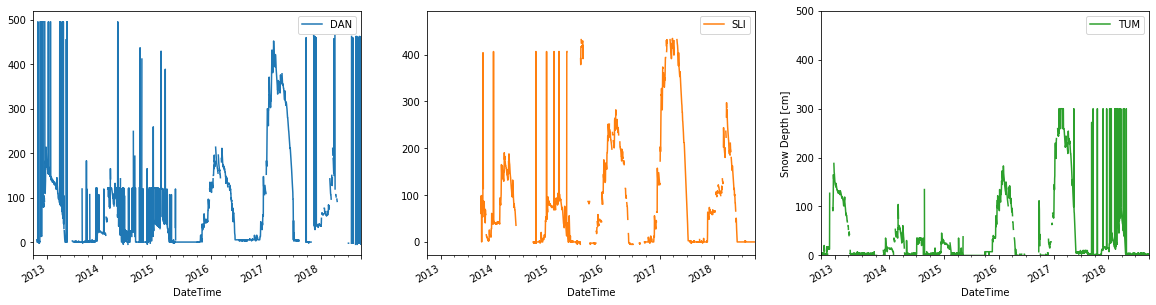

In [65]:
# merge snow depth [in] CSVs

# load single df, first in flist
df = pd.read_csv(flist[0], header=0, usecols=[0,1], names=['DateTime', flist[0].split("/")[-1][:3]])
df['DateTime'] = pd.to_datetime(df['DateTime']) #datetime dtype
df = df.set_index('DateTime') #set datatime as index

# add columns to df
for f in sorted(flist):
        
    tmp_df = pd.read_csv(f, usecols=[0,1]) # load each csv as a tmp_df
    site_id = f.split("/")[-1][:3] #grab site id name from filename
    df.loc[:,site_id] = tmp_df['SNOW DP INCHES'].values # insert temp_df column into df at location (all rows, new site_id name)
    
df=df.replace('--', np.nan)  #raw data has '--' string to mark no value, replace w/ NANs
df=df.astype(float) #cast as float

df = df * 2.54 # convert raw [inches] to [cm] of snow
#note - data have a few negatives (-1,-2), but not too large...


#~~~~plot it
# fig = plt.figure(figsize=(20,15)) #NOT ACTUALLY WORKING...size? plt.plot(df) works but loose 'easy' legend lables
# df.plot(figsize=(20,8))
df.plot(subplots=True, layout=(1,3), figsize=(20,5))
plt.ylabel('Snow Depth [cm]')
plt.ylim(0,500)
plt.legend(loc='best')

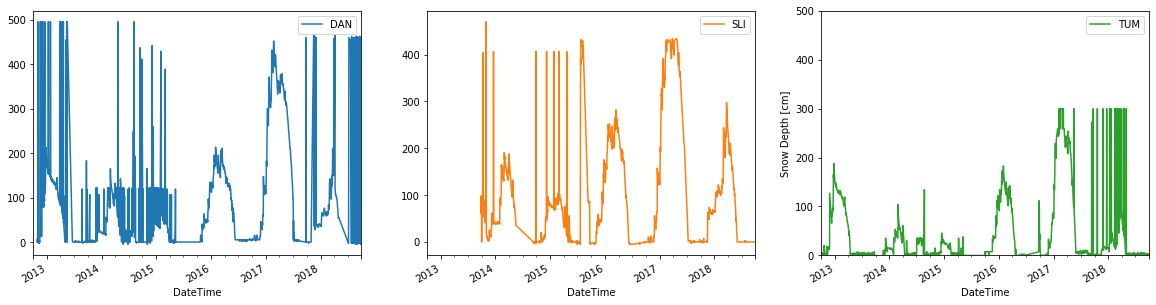

In [66]:
# df.resample('Y')
df_itp = df.interpolate()
df_itp.plot(subplots=True, layout=(1,3), figsize=(20,5))
plt.ylabel('Snow Depth [cm]')
plt.ylim(0,500)
plt.legend(loc='best')

YEAR: 2012
            DAN    SLI   TUM
DateTime                    
2012-10-01  NaN    NaN  2.54
2012-10-02  NaN    NaN  0.00
2012-10-03  NaN    NaN  0.00
2012-10-04  NaN    NaN  0.00
2012-10-05  NaN    NaN  2.54
...         ...    ...   ...
2013-09-26  NaN  96.52  0.00
2013-09-27  NaN  86.36  0.00
2013-09-28  NaN  68.58  0.00
2013-09-29  NaN    NaN  0.00
2013-09-30  NaN  71.12  0.00

[365 rows x 3 columns]
MINI CLEAN             DAN  SLI  TUM
DateTime                 
2012-10-01  NaN  NaN  NaN
2012-10-02  NaN  NaN  NaN
2012-10-03  NaN  NaN  NaN
2012-10-04  NaN  NaN  NaN
2012-10-05  NaN  NaN  NaN
...         ...  ...  ...
2018-09-26  NaN  NaN  NaN
2018-09-27  NaN  NaN  NaN
2018-09-28  NaN  NaN  NaN
2018-09-29  NaN  NaN  NaN
2018-09-30  NaN  NaN  NaN

[2191 rows x 3 columns]
YEAR: 2013
             DAN    SLI  TUM
DateTime                    
2013-10-01   NaN    NaN  NaN
2013-10-02   NaN  88.90  NaN
2013-10-03   NaN  96.52  NaN
2013-10-04  2.54  86.36  NaN
2013-10-05   NaN  53.34  NaN


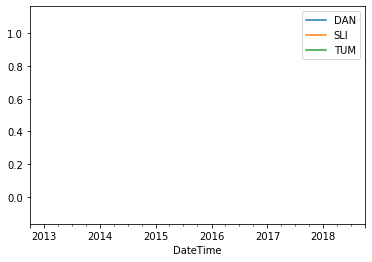

In [127]:
df_clean = pd.DataFrame().reindex_like(df)
water_years=list(range(2012,2019))

for wy in water_years:
    df_wy = df.loc['{}-10-01'.format(wy) : '{}-09-30'.format(wy+1)]
#     print(data.index)
    
    #compute the inner-quartile range (5-95% of data)
    Q1 = df_wy.quantile(0.05)
    Q3 = df_wy.quantile(0.95)
#     IQR = Q3 - Q1

    #remove outliers
    df_tmp = df_wy[(df_wy > Q1) & (df_wy < Q3)] #everything between the IQR
    df_tmp = df_tmp[(df_tmp >= 0)] #remove negatives
    print('YEAR:', wy)
#     print(df.max())
#     print(df_tmp.max())
    print(df_tmp)
    print('MINI CLEAN', df_clean)
#     df.plot()
#     df_wy.plot()
    df_clean.append(df_tmp)
# print('RAW\n', df.max(), df.min()) #df (raw)
# print('\nCLEAN\n', df_clean.max(), df_clean.min()) # df_clean

df_clean.plot()


In [53]:
#compute the inner-quartile range (5-95% of data)
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

#remove outliers
df_out = df[(df > Q1) & (df < Q3)] #everything between the IQR
df_out = df_out[(df_out >= 0)] #remove negatives
print('OG\n', df.max(), df.min()) #df (raw)
print('\nOUT\n', df_out.max(), df_out.min()) # df_out (clean)

#ref: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

OG
 DAN    495.30
SLI    469.90
TUM    299.72
dtype: float64 DAN    -5.08
SLI    -5.08
TUM   -30.48
dtype: float64

OUT
 DAN    396.24
SLI    375.92
TUM    226.06
dtype: float64 DAN    2.54
SLI    0.00
TUM    2.54
dtype: float64


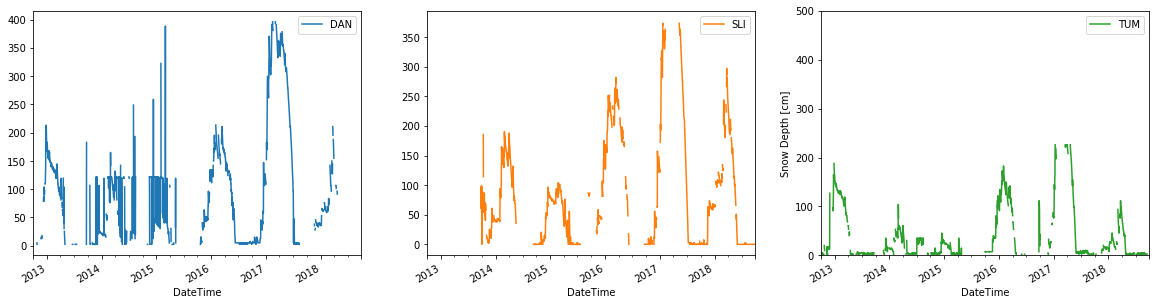

In [54]:
df_out.plot(subplots=True, layout=(1,3), figsize=(20,5))
plt.ylabel('Snow Depth [cm]')
plt.ylim(0,500)
plt.legend(loc='best')

In [ ]:
df.boxplot()

In [ ]:
boo = pd.DataFrame(np.random.randint(0,5,size=(10, 4)), columns=list('ABCD'))
boo.dtypes
boo

In [ ]:
boo.replace(0, 'bla', inplace=True)
boo